In [ ]:
import time
import datetime
import zoneinfo
import os
import keras
import numpy as np
from glob import glob
from tqdm import tqdm
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import seaborn as sns
import matplotlib.pyplot as plt
from keras import Sequential
from keras.layers import Dense, Dropout
from keras.models import load_model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.applications import efficientnet_v2, resnet_v2
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
tiempo_inicial = time.time()
# creamos las zonas horarias ( https://nodatime.org/TimeZones )
zona_hermosillo = zoneinfo.ZoneInfo("America/Hermosillo")

## **Datos**

In [ ]:
%pip install kaggle

In [ ]:
os.environ['KAGGLE_USERNAME'] = 'edelmiraapoyocursos'
#os.environ['KAGGLE_KEY'] = 'kaggle datasets download -d gpiosenka/coffee-bean-dataset-resized-224-x-224'

In [ ]:
!kaggle datasets download -d gpiosenka/coffee-bean-dataset-resized-224-x-224

Dataset URL: https://www.kaggle.com/datasets/gpiosenka/coffee-bean-dataset-resized-224-x-224
License(s): CC-BY-SA-4.0
 99% 143M/144M [00:03<00:00, 44.5MB/s]
100% 144M/144M [00:03<00:00, 39.0MB/s]


In [ ]:
%pip install unzip

  Preparing metadata (setup.py) ... done
  Created wheel for unzip: filename=unzip-1.0.0-py3-none-any.whl size=1283 sha256=1ebdc21b3c666d70897a49a3e17a7d187086c11053099b07c033a62eee1e24a9
  Stored in directory: /root/.cache/pip/wheels/3c/4d/b3/ddd83a91322fba02a91898d3b006090d1df1d3b0ad61bd8b36
Successfully built unzip


In [ ]:
!unzip /content/coffee-bean-dataset-resized-224-x-224.zip -d data

Archive:  /content/coffee-bean-dataset-resized-224-x-224.zip
replace data/Coffee Bean.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
data_train_dir = '/content/data/train'
class_names = sorted(os.listdir(data_train_dir))
n_classes = len(class_names)
class_names

['Dark', 'Green', 'Light', 'Medium']

In [ ]:
class_dis = [len(glob('/content/data/train/' + name + "/*.png")) for name in class_names]
class_dis

[300, 300, 300, 300]

### Cargar los datos

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_train_dir,
  validation_split = 0.2,
  subset           = "training",
  seed             = 123,
  image_size       = (img_height, img_width),
  batch_size       = batch_size)

Found 1200 files belonging to 4 classes.
Using 960 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_train_dir,
  validation_split = 0.2,
  subset           = "validation",
  seed             = 123,
  image_size       = (img_height, img_width),
  batch_size       = batch_size)

Found 1200 files belonging to 4 classes.
Using 240 files for validation.


### **Visualizando las imágenes y las clases**

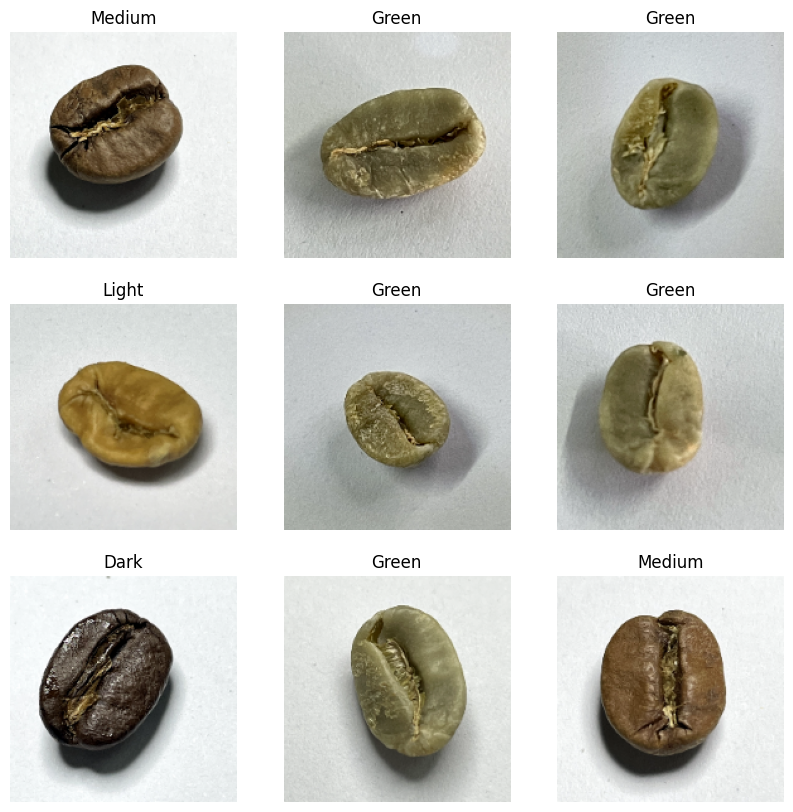

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")



---



---



# Modelo1

In [ ]:
batch_size = 32
img_height = 150
img_width = 150

In [ ]:
# import imageio
# import os

# import matplotlib.image  as mpimg
# import matplotlib.pyplot as plt
# import tensorflow        as tf
# import numpy             as np

# from os.path          import join
# from tensorflow       import keras
# from keras.models     import Sequential
# from keras.layers     import Dense, Flatten, Dropout, BatchNormalization, Activation, Input
# from keras.optimizers import Adam, Adagrad, SGD, Nadam


# from keras.utils      import load_img
# from keras.utils      import img_to_array

# from scipy            import misc, ndimage
# from numpy            import expand_dims

# from sklearn.metrics  import confusion_matrix
# from sklearn.metrics  import  ConfusionMatrixDisplay

In [ ]:
train_ds, val_ds = image_dataset_from_directory(
                    directory        =  data_train_dir,
                    labels           = 'inferred',
                    class_names      =  ['Dark','Green','Light','Medium'],
                    image_size       = (img_height,img_width),
                    label_mode       = 'int',
                    seed             = 123,
                    shuffle          = True,
                    validation_split = 0.2,
                    subset           = "both",
                    batch_size       = batch_size,
)

Found 1200 files belonging to 4 classes.
Using 960 files for training.
Using 240 files for validation.


In [ ]:
train_ds.class_names

['Dark', 'Green', 'Light', 'Medium']

In [ ]:
train_label = np.concatenate([y for x, y in train_ds], axis=0)
len(train_label)

960

In [ ]:
unique_elements, count_elements = np.unique(train_label,return_counts=True)
print(f"Las clases existentes son: {unique_elements} ")
print(f"Total de muestras: {count_elements}")
for i in unique_elements:
  print(f"Hay un {100*count_elements[i]/count_elements.sum():.2f}% muestras de la clase {i}")

Las clases existentes son: [0 1 2 3] 
Total de muestras: [247 223 241 249]
Hay un 25.73% muestras de la clase 0
Hay un 23.23% muestras de la clase 1
Hay un 25.10% muestras de la clase 2
Hay un 25.94% muestras de la clase 3


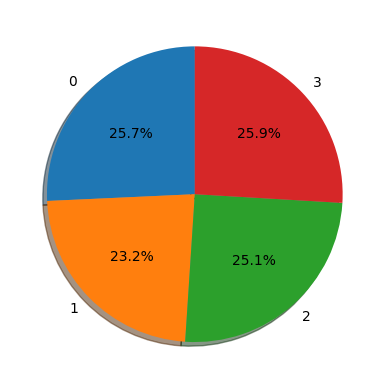

In [ ]:
fig1,ax1=plt.subplots()
ax1.pie( count_elements, labels=unique_elements, autopct='%1.1f%%',shadow=True,startangle=90 )
plt.show()

In [ ]:
val_label = np.concatenate([y for x, y in val_ds], axis=0)
len(val_label)

240

In [ ]:
val_ds.class_names

['Dark', 'Green', 'Light', 'Medium']

In [ ]:
unique_elements, count_elements = np.unique(val_label,return_counts=True)
print(f"Las clases existentes son: {unique_elements} ")
print(f"Total de muestras: {count_elements}")
for i in unique_elements:
  print(f"Hay un {100*count_elements[i]/count_elements.sum():.2f}% muestras de la clase {i}")

Las clases existentes son: [0 1 2 3] 
Total de muestras: [53 77 59 51]
Hay un 22.08% muestras de la clase 0
Hay un 32.08% muestras de la clase 1
Hay un 24.58% muestras de la clase 2
Hay un 21.25% muestras de la clase 3


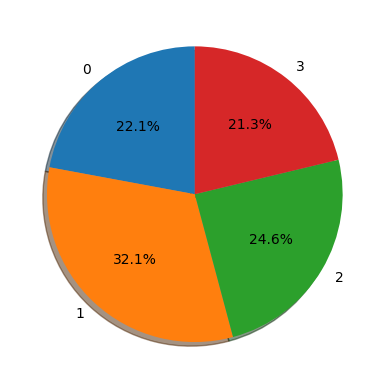

In [ ]:
fig1,ax1=plt.subplots()
ax1.pie( count_elements, labels=unique_elements, autopct='%1.1f%%',shadow=True,startangle=90 )
plt.show()

##Gráficas de loss y accuracy

##Matriz de confusión



---



---



#Aumento de datos

##Modelo2

##Gráficas de loss y accuracy

##Matriz de confusión

In [ ]:
hora_hermosillo = datetime.datetime.now(zona_hermosillo)

In [ ]:
print(f'Hermosillo,  {hora_hermosillo.hour}:{hora_hermosillo.minute}:{hora_hermosillo.second}')

Hermosillo,  9:7:52


In [ ]:
print(f'Tiempo total: {(time.time() - tiempo_inicial)/60:.5f} mins')

Tiempo total: 0.80720 mins
